<a href="https://colab.research.google.com/github/anas1IA/MLP_Neural_Network/blob/main/MLP_NeurralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mininmus Number of Neurons and Layers for our neurl Network

In [24]:
from sklearn.datasets import make_blobs, make_classification


In [5]:
!pip install tensorflow

In [32]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [42]:
class DataGenerator:
  def __init__(self,  totalDatasamples ,nofclusters,featureCount=2):
    self.totalDatasamples = totalDatasamples
    self.nofclusters =  nofclusters
    self.X ,self.y = make_blobs(n_samples=totalDatasamples , centers = nofclusters ,
                               n_features=featureCount , cluster_std=2 ,random_state=2)

  def TrainTestSplit(self , tarinTestSplitRatio = 0.6):
      self.tarinTestSplitRatio = tarinTestSplitRatio
      self.y = to_categorical(self.y)
      self.n_train = int(round(self.totalDatasamples*tarinTestSplitRatio))
      self.trainX , self.testX = self.X[:self.n_train, :] , self.X[self.n_train: ,:]
      self.trainy , self.testy = self.y[:self.n_train, :] , self.y[self.n_train: ,:]
      return (self.trainX ,self.trainy ,self.testX ,self.testy)
  def Plot(self):
      for class_value in range(self.nofclusters):
        row_ix = np.where(self.y == class_value)
        plt.scatter(self.X[row_ix, 0] , self.X[row_ix ,1])
      plt.show()



In [51]:
data1=DataGenerator(500,5,10)


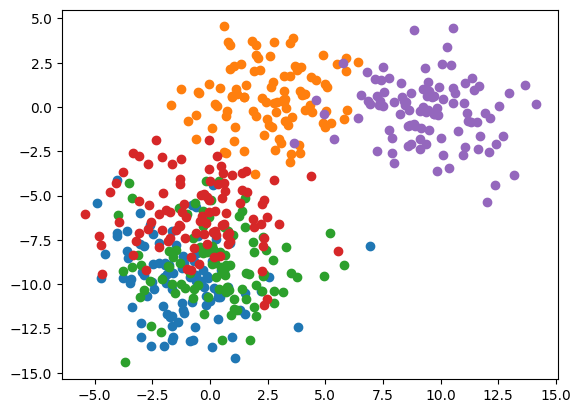

In [52]:

data1.Plot()


## single Layer Architecture

In [ ]:
class NaiveModel:
  def __init__(self) :
     self.model = Sequential()
     self.batchsize = 256
  def __compliteWithSGD(self ,lr = 0.01 , momentum = 0.66):
    opt = SGD(lr = lr , momentum = momentum)
    self.model.compile(loss = 'categorical_croosentropy',optimizer = opt ,metrics =['accuracy'])
  def BuildSequential_SingleLayer(self , inputdimension ,noofclass, neruronesCountForlayer):
    self.model.add(Dense(neruronesCountForlayer ,input_dim = inputdimension ,activation ='relu',kernel_initializer='he_unform'))
    self.model.add(Dense(noofclass ,activation='softmax'))
    self.__compliteWithSGD()
  def BuildSequential_Multilayer(self ,inputdimension ,noofclassess,layerNeurones= 50 ,reduceBy =10):
     self.model.add(Dense(layerNeurones ,input_dim = inputdimension ,activation ='relu',kernel_initializer='he_unform'))
     for neuronCout in range(layerNeurones-reduceBy , noofclassess ,-reduceBy):
            self.model.add(Dense( neuronCout ,activation ='relu',kernel_initializer='he_unform'))
     self.model.add(Dense(noofclassess ,activation ='softmax'))
     self.__compliteWithSGD()
  def Fit(self  ,trainX ,trainy ,testX, testy ,noOFpoches=100 ,verbose_out=0):
    self.history = self.model.fit(trainX,trainy ,validation_data = (testX ,testy),epochs=noOFpoches,verbose=verbose_out,batch_size = self.batchsize)
    _,self.test_accuracy =  self.model.evaluate(testX,testy,verbose=verbose_out)
    self.test_accuracy = round(self.test_accuracy,3)
  def PlotFit(self):



In [1]:
import numpy as np

class ExampleClassifier:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def get_indices_for_class(self, class_value):
        row_ix = np.where(self.y == class_value)
        return row_ix

# Example usage:
# Creating a sample dataset
X_sample = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_sample = np.array([0, 1, 0, 1])

# Creating an instance of the ExampleClassifier
classifier = ExampleClassifier(X_sample, y_sample)

# Getting indices for class 1
indices_class_1 = classifier.get_indices_for_class(1)

# Printing the result
print("Indices for class 1:", indices_class_1)


Indices for class 1: (array([1, 3]),)
